In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_Train = pd.read_csv('Train.csv')

In [6]:
df_Train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
df_Test = pd.read_csv('Test.csv')

In [8]:
df_Test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [9]:
df_Train.shape

(8523, 12)

In [10]:
# Exploratory data analysis (EDA)

In [11]:
# Null vlaue check

In [12]:
df_Train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df_Test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [14]:
# We have null values in same column for both test and train data

In [15]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [16]:
df_Train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [17]:
# Now for Item_Weight col let's fill null values with mean of the data

In [18]:
df_Train['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [19]:
df_Train['Item_Weight'].fillna(df_Train['Item_Weight'].mean(), inplace=True)
df_Test['Item_Weight'].fillna(df_Test['Item_Weight'].mean(), inplace=True)

In [20]:
df_Train['Item_Weight'].isnull().sum()

0

In [21]:
df_Train['Outlet_Size'].describe()

count       6113
unique         3
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [22]:
# So as Outlet_SIze is categorical variable will use Mode imputation.

In [23]:
df_Train['Outlet_Size'].fillna(df_Train['Outlet_Size'].mode()[0], inplace=True)
df_Test['Outlet_Size'].fillna(df_Test['Outlet_Size'].mode()[0], inplace=True)

In [24]:
# Now we have removed all null values.
print("Null values in train data: ",df_Train.isnull().sum())
print("Null values in test data: ", df_Test.isnull().sum())

Null values in train data:  Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64
Null values in test data:  Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64


In [25]:
# Feature selection process:
# Selecting features based on requirements

In [26]:
# As we don't required Item_Identifier and Outlet_Identifier as it's just serial number, so will drop these both columns.

In [27]:
df_Train.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)
df_Test.drop(['Item_Identifier','Outlet_Identifier'], axis=1, inplace=True)

In [28]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


C:\Users\sumed\AppData\Local\Temp\ipykernel_20376\1179207064.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=count_data, ax=axes[i], palette="magma")
C:\Users\sumed\AppData\Local\Temp\ipykernel_20376\1179207064.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=count_data, ax=axes[i], palette="magma")
C:\Users\sumed\AppData\Local\Temp\ipykernel_20376\1179207064.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Count', data=count_data, ax=axes[i], palette="magma")
C:\Users\sume

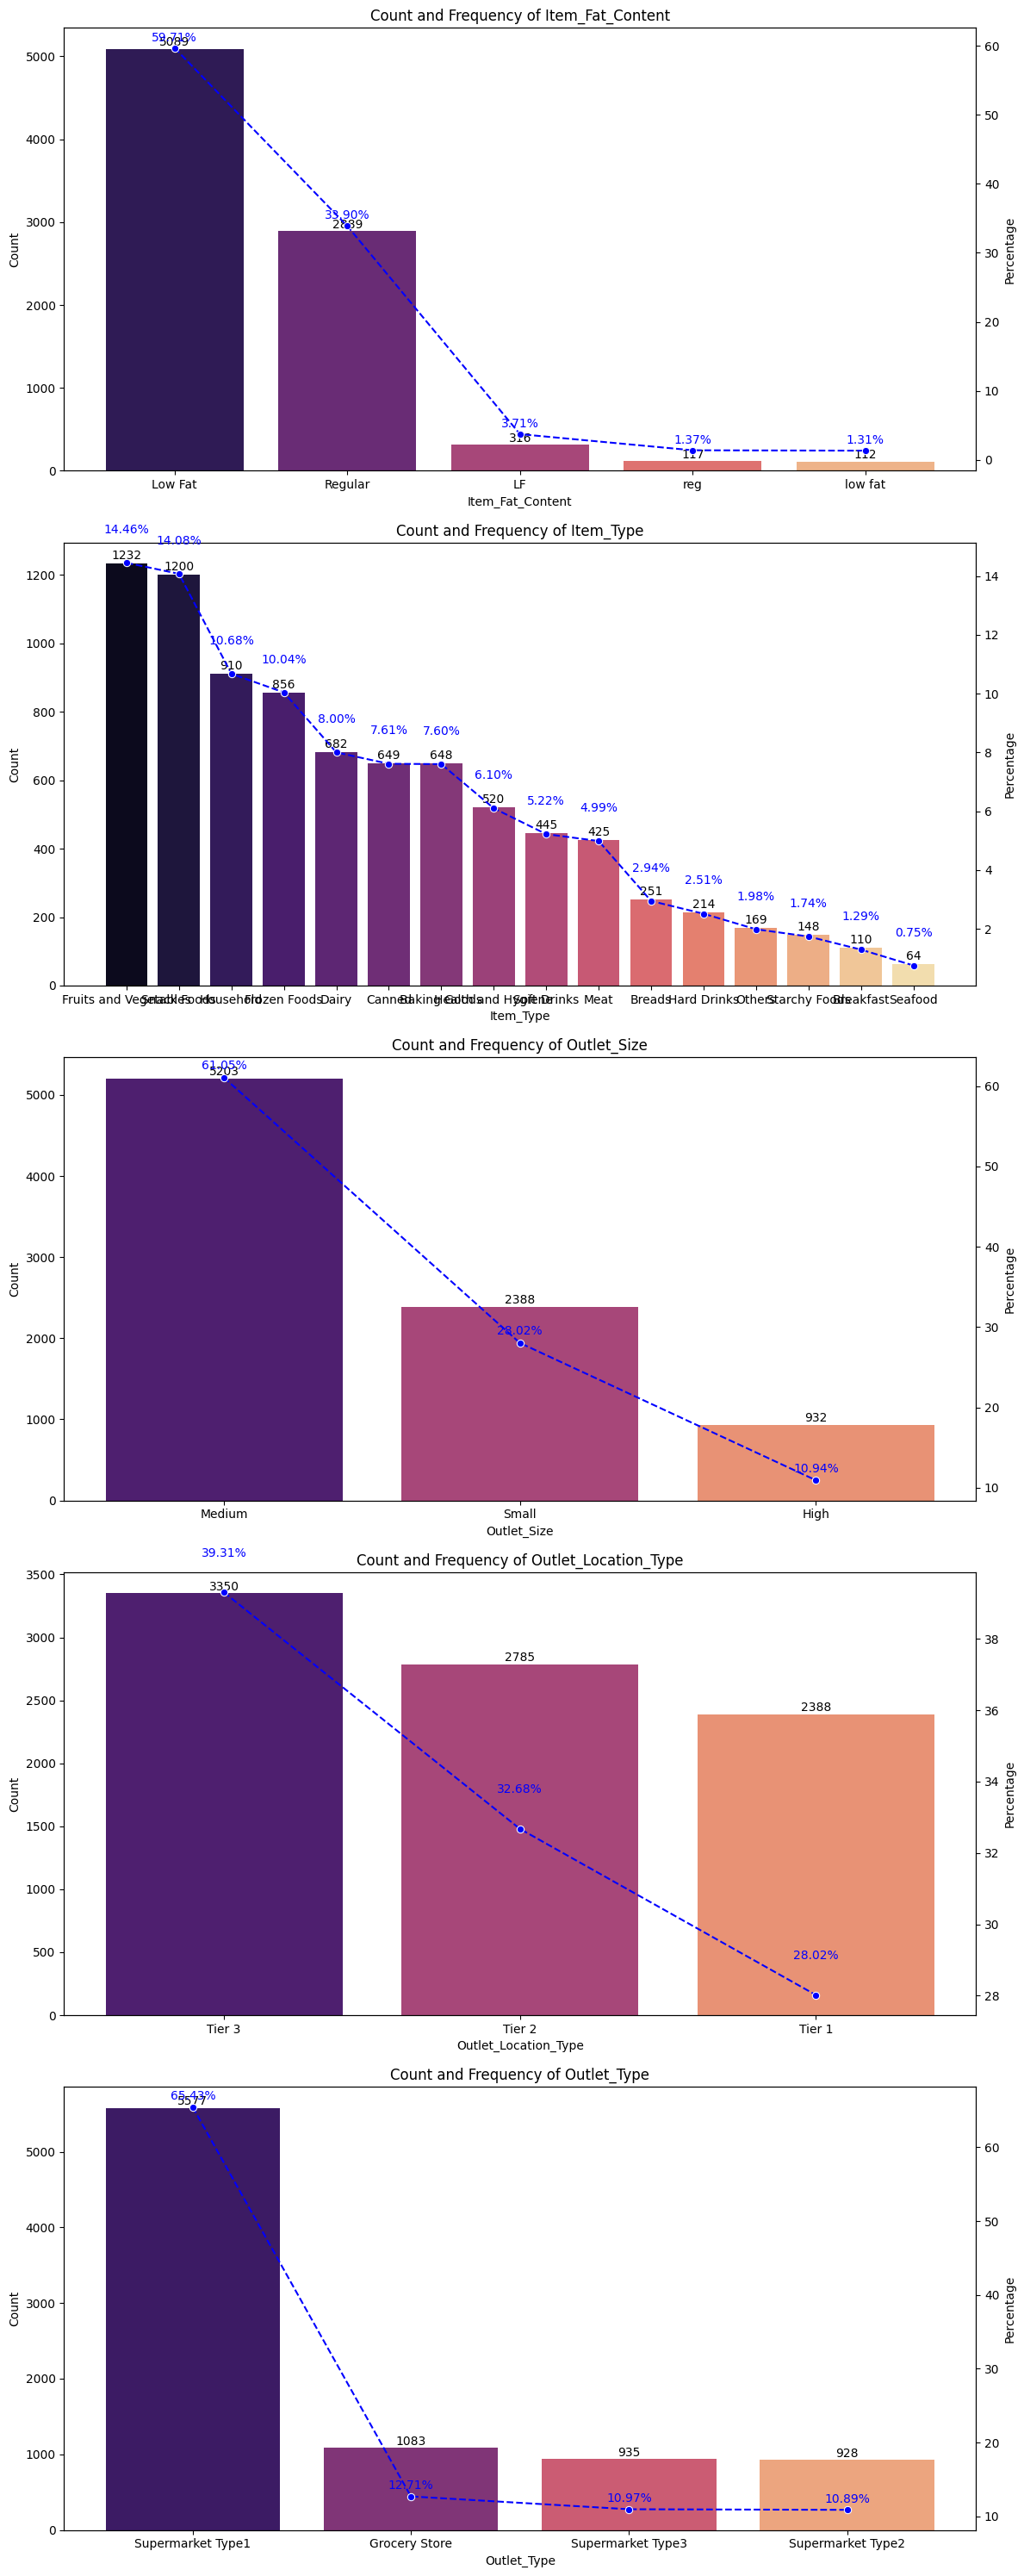

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
categorical_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

# Define a FacetGrid with each categorical feature as a separate plot
fig, axes = plt.subplots(len(categorical_cols), 1, figsize=(12, 30))

# Loop through each categorical column to create FacetGrid plots
for i, col in enumerate(categorical_cols):
    # Get counts and calculate frequencies
    count_data = df_Train[col].value_counts().reset_index()
    count_data.columns = [col, 'Count']
    count_data['Percentage'] = (count_data['Count'] / count_data['Count'].sum()) * 100

    # Plot count and percentage on dual y-axes
    sns.barplot(x=col, y='Count', data=count_data, ax=axes[i], palette="magma")
    ax2 = axes[i].twinx()
    sns.lineplot(x=col, y='Percentage', data=count_data, marker='o', color='b', ax=ax2, linestyle='--')

    # Set titles and labels
    axes[i].set_title(f'Count and Frequency of {col}')
    axes[i].set_ylabel('Count')
    ax2.set_ylabel('Percentage')

    # Annotate counts on bar plot
    for j in range(count_data.shape[0]):
        axes[i].text(j, count_data['Count'][j] + 5, f'{count_data["Count"][j]}', ha='center', va='bottom')
        ax2.text(j, count_data['Percentage'][j] + 1, f'{count_data["Percentage"][j]:.2f}%', ha='center', color='blue')

plt.tight_layout()
plt.show()


In [30]:
# Now let's use pandas profilling

In [31]:
import sweetviz as sv

In [32]:
report = sv.analyze(df_Train)
report.show_html('report.html')

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
import webbrowser

# Replace 'report.html' with the actual path if it’s in a different folder
webbrowser.open('report.html')

True

In [38]:
import plotly.express as px
# Create a long-form DataFrame with only numeric columns for easier plotting
numeric_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
df_long = df_Train.melt(value_vars=numeric_columns, var_name="Feature", value_name="Value")

# Interactive box plot with facets
fig = px.box(df_long, x="Feature", y="Value", points="all", title="Outliers in Numeric Columns")
fig.show()


In [40]:
import plotly.graph_objects as go

# Set threshold values for demonstration purposes
threshold_sales = 7000  # Set a threshold for 'Item_Outlet_Sales'

# Highlight outliers in 'Item_Outlet_Sales'
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_Train['Item_Visibility'], y=df_Train['Item_Outlet_Sales'],
                         mode='markers', marker=dict(color='blue'), name='Normal Points'))
fig.add_trace(go.Scatter(x=df_Train[df_Train['Item_Outlet_Sales'] > threshold_sales]['Item_Visibility'],
                         y=df_Train[df_Train['Item_Outlet_Sales'] > threshold_sales]['Item_Outlet_Sales'],
                         mode='markers', marker=dict(color='red', size=10), name='Outliers'))

fig.update_layout(title="Interactive Scatter Plot with Outliers Highlighted",
                  xaxis_title="Item Visibility", yaxis_title="Item Outlet Sales")
fig.show()


In [41]:
# Annotated Heatmap with Detailed Hover Information

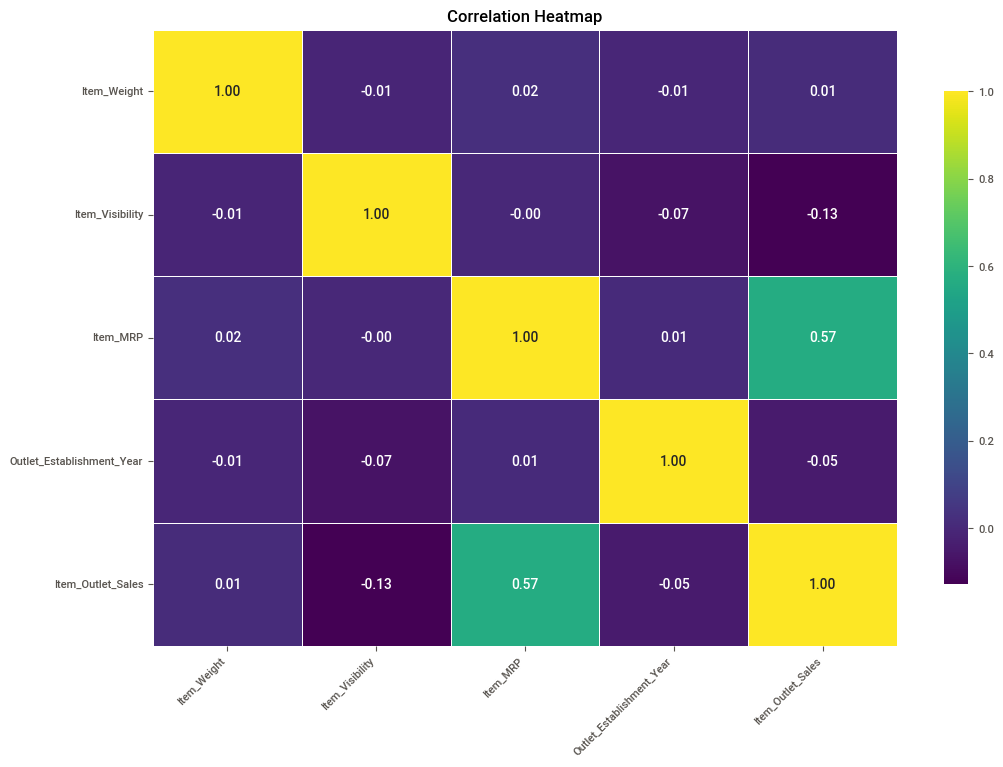

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df_Train.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()


In [47]:
# Let's plot categorical plot

In [52]:
# Interactive box plot for 'Item_Outlet_Sales' by 'Outlet_Type'
fig = px.box(df_Train, x='Outlet_Type', y='Item_Outlet_Sales', points="all", title="Item Outlet Sales by Outlet Type")
fig.show()


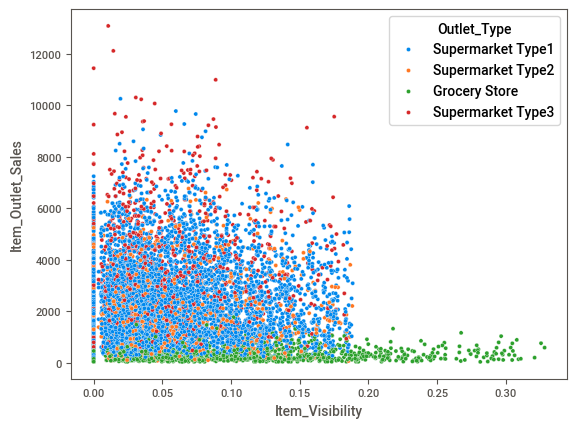

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors

# Example scatter plot
fig, ax = plt.subplots()
sns.scatterplot(data=df_Train, x="Item_Visibility", y="Item_Outlet_Sales", hue="Outlet_Type", ax=ax)

# Add interactivity with mplcursors
cursor = mplcursors.cursor(ax, hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"{df_Train['Item_Outlet_Sales'][sel.target.index]:.2f}"))

plt.show()


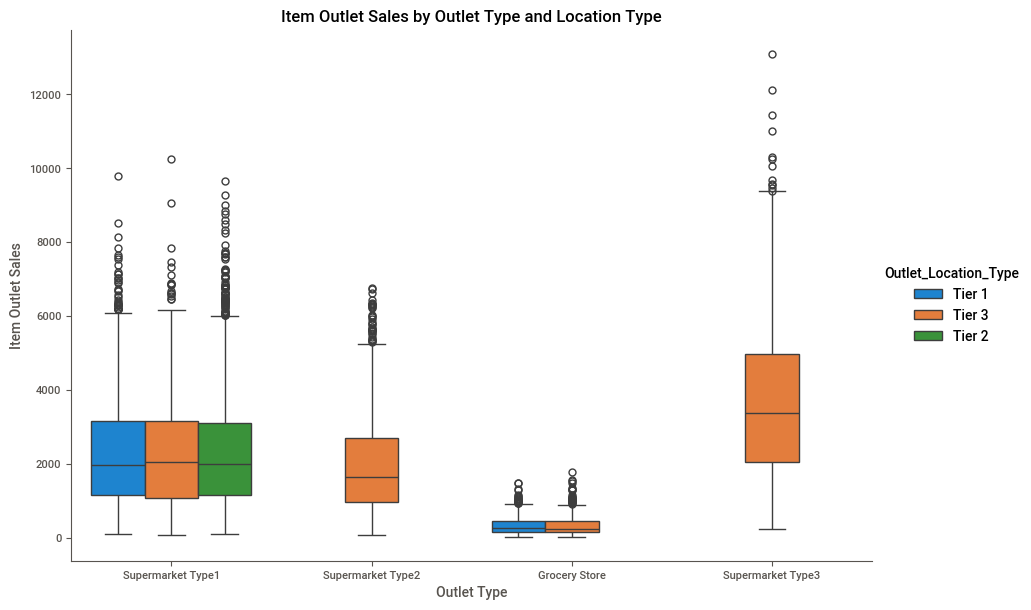

In [53]:
# Catplot for 'Item_Outlet_Sales' by 'Outlet_Type' and 'Outlet_Location_Type'
sns.catplot(data=df_Train, x='Outlet_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', kind='box', height=6, aspect=1.5)
plt.title('Item Outlet Sales by Outlet Type and Location Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()


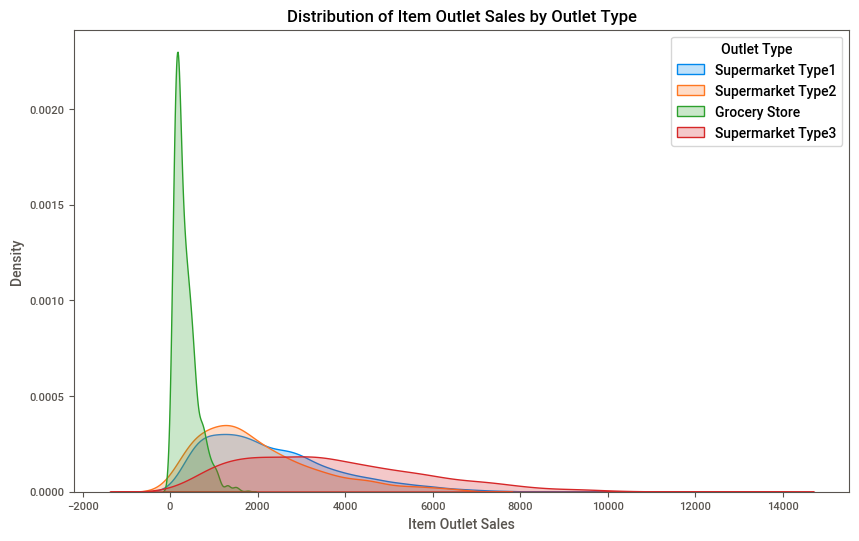

In [54]:
# Dist plot by 'Outlet_Type' for 'Item_Outlet_Sales'
plt.figure(figsize=(10, 6))
for outlet_type in df_Train['Outlet_Type'].unique():
    sns.kdeplot(df_Train[df_Train['Outlet_Type'] == outlet_type]['Item_Outlet_Sales'], label=outlet_type, fill=True)

plt.title('Distribution of Item Outlet Sales by Outlet Type')
plt.xlabel('Item Outlet Sales')
plt.ylabel('Density')
plt.legend(title='Outlet Type')
plt.show()


In [55]:
# Let's change ovject dtype to category to reduce memory usage.
# Convert all object columns to category
df_Train = df_Train.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)


In [56]:

df_Test = df_Test.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)


In [57]:
df_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   float64 
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   float64 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   float64 
 5   Outlet_Establishment_Year  8523 non-null   int64   
 6   Outlet_Size                8523 non-null   category
 7   Outlet_Location_Type       8523 non-null   category
 8   Outlet_Type                8523 non-null   category
 9   Item_Outlet_Sales          8523 non-null   float64 
dtypes: category(5), float64(4), int64(1)
memory usage: 376.0 KB


In [58]:
# Now let's do data preprocessing for Model devolopment

In [59]:
# 1. Label encoding 

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
le = LabelEncoder()

In [65]:
df_Train['Item_Fat_Content']= le.fit_transform(df_Train['Item_Fat_Content'])
df_Train['Item_Type']= le.fit_transform(df_Train['Item_Type'])
df_Train['Outlet_Size']= le.fit_transform(df_Train['Outlet_Size'])
df_Train['Outlet_Location_Type']= le.fit_transform(df_Train['Outlet_Location_Type'])
df_Train['Outlet_Type']= le.fit_transform(df_Train['Outlet_Type'])

In [68]:
df_Train.drop(columns=['item_fat_content','item_type','outlet_size','outlet_location_type','outlet_type'],inplace=True)

In [69]:
df_Train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,1,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.920,2,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.500,1,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.200,2,0.000000,6,182.0950,1998,1,2,0,732.3800
4,8.930,1,0.000000,9,53.8614,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,1,0.056783,13,214.5218,1987,0,2,1,2778.3834
8519,8.380,2,0.046982,0,108.1570,2002,1,1,1,549.2850
8520,10.600,1,0.035186,8,85.1224,2004,2,1,1,1193.1136
8521,7.210,2,0.145221,13,103.1332,2009,1,2,2,1845.5976


In [70]:
# Splitting our data into train and test

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
X=df_Train.drop('Item_Outlet_Sales',axis=1)
Y=df_Train['Item_Outlet_Sales']

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

In [75]:
# Standarization

In [76]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [78]:
X_train_std= sc.fit_transform(X_train)
X_test_std= sc.transform(X_test)

In [79]:
X_train_std

array([[ 1.52290029, -0.57382672,  0.68469729, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.23985603, -0.57382672, -0.09514748, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.54667616,  0.97378032, -0.00838589, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [-0.08197107, -0.57382672, -0.9191623 , ...,  1.37953713,
        -1.36527477, -0.25964107],
       [-0.74888428,  0.97378032,  1.21363058, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 0.67885683, -0.57382672,  1.83915356, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [80]:
import joblib

In [87]:
# Model Building

In [88]:
# 1. Linear regression

In [82]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [83]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [84]:
Y_pred_lr=lr.predict(X_test_std)

In [85]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [86]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5041875762809336
880.9999067141265
1162.4412660891485


In [89]:
# 2. Now let's use Random Forest Regressor

In [90]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [91]:
rf.fit(X_train_std,Y_train)

RandomForestRegressor(n_estimators=1000)

In [92]:
Y_pred_rf= rf.predict(X_test_std)

In [93]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.550714648449741
780.581045540293
1106.5561238259918


In [94]:
# Lets do Hyper Parameter Tuning for better results

In [96]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define models and parameters
model = RandomForestRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)

#cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=101)

grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.551 using {'n_estimators': 1000}
0.511 (0.006) with: {'n_estimators': 10}
0.547 (0.008) with: {'n_estimators': 100}
0.551 (0.006) with: {'n_estimators': 1000}


In [97]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, random_state=42),
    "LightGBM": LGBMRegressor(random_state=42)
}

# Evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train_std, Y_train)
    y_pred = model.predict(X_test_std)
    mae = mean_absolute_error(Y_test, y_pred)
    results[model_name] = mae
    print(f"{model_name} MAE: {mae:.2f}")

# Display results
print("\nModel Comparison:")
for model, mae in sorted(results.items(), key=lambda item: item[1]):
    print(f"{model}: {mae:.2f}")


Linear Regression MAE: 881.00
Decision Tree MAE: 1045.37
Random Forest MAE: 786.20
Gradient Boosting MAE: 741.99
XGBoost MAE: 821.80
CatBoost MAE: 769.57
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 751
[LightGBM] [Info] Number of data points in the train set: 6818, number of used features: 9
[LightGBM] [Info] Start training from score 2199.293549
LightGBM MAE: 761.68

Model Comparison:
Gradient Boosting: 741.99
LightGBM: 761.68
CatBoost: 769.57
Random Forest: 786.20
XGBoost: 821.80
Linear Regression: 881.00
Decision Tree: 1045.37


In [99]:
# Finalize the Best Model
# Since Gradient Boosting has the lowest MAE, let’s use it as the final model for making predictions. You can refit it on the entire training dataset to ensure it has learned from all available data before making predictions.

In [100]:
final_model = GradientBoostingRegressor(random_state=42)
final_model.fit(X_train_std, Y_train)

GradientBoostingRegressor(random_state=42)

In [101]:
# Predict on the test set
y_pred = final_model.predict(X_test_std)

# To see actual predictions
print("Predicted values:", y_pred)

Predicted values: [1462.66355778 2565.33901054 1286.86947584 ...  496.5323774  1626.38076757
 2458.89072464]


In [102]:
import pandas as pd

# Create a DataFrame to compare actual vs. predicted values
results = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})

# Display the comparison
print(results.head())

         Actual    Predicted
8179   904.8222  1462.663558
8355  2795.6942  2565.339011
3411  1947.4650  1286.869476
7089   872.8638   643.924465
6954  2450.1440  2511.670306


In [103]:
from sklearn.metrics import mean_absolute_error

# Calculate the MAE for the test set
final_mae = mean_absolute_error(Y_test, y_pred)
print("Final Test MAE:", final_mae)

Final Test MAE: 741.9942156699992


In [104]:
r2_score(Y_test,y_pred)

0.5980555437035566

In [105]:
# GradientBoostingRegressor will be our final model and will save and deploy this model.

In [106]:
# Bar Plot for Mean Absolute Error (MAE) Comparison

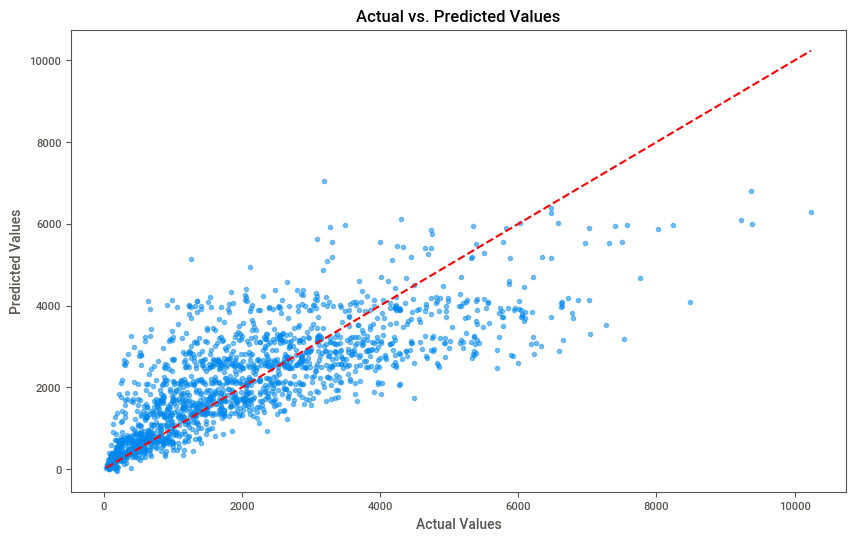

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], '--r')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


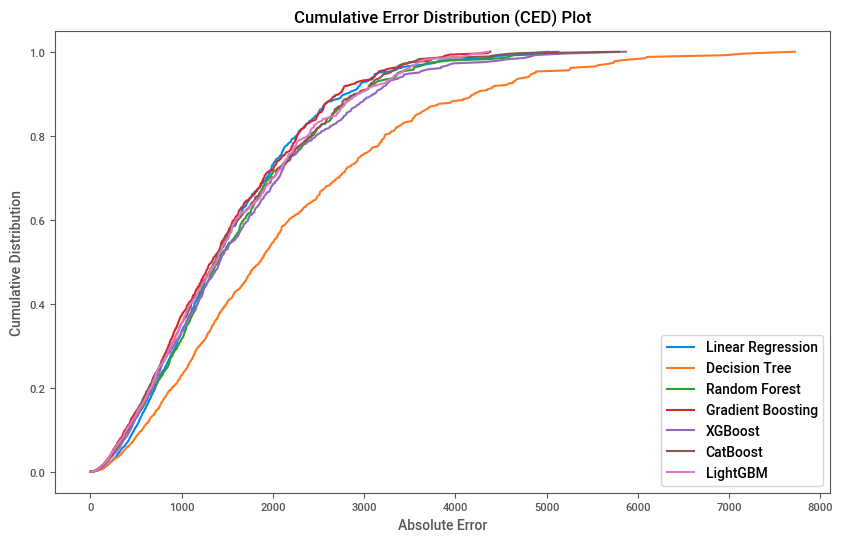

In [112]:
import numpy as np

plt.figure(figsize=(10, 6))
for model_name, model in models.items():
    y_pred = model.predict(X_test_std)
    errors = np.abs(Y_test - y_pred)
    sorted_errors = np.sort(errors)
    cumulative_errors = np.cumsum(sorted_errors) / np.sum(sorted_errors)
    plt.plot(sorted_errors, cumulative_errors, label=model_name)

plt.xlabel("Absolute Error")
plt.ylabel("Cumulative Distribution")
plt.title("Cumulative Error Distribution (CED) Plot")
plt.legend(loc="lower right")
plt.show()


In [114]:
# Let's Save the model

In [115]:
import joblib

In [116]:
joblib.dump(final_model, r'D:\Data_Science_besics\Projects\Sales-Performance-Customer-Segmentation-using-End-to-End-Data-Analysis-and-machine-learning-project\Final_model.sav')

['D:\\Data_Science_besics\\Projects\\Sales-Performance-Customer-Segmentation-using-End-to-End-Data-Analysis-and-machine-learning-project\\Final_model.sav']